In [1]:
# imports and function definitions
import numpy as np
import sympy as sym
from scipy.integrate import solve_bvp # solve boundary value problem
from scipy.integrate import solve_ivp # solve initial value problem
from scipy.optimize import minimize
import math
pi = math.pi
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
nt = 101
time = np.linspace(0,1,nt)

In [3]:
def dynamics(t, q, u):
    q11, q12, q13, q14, q21, q22, q23, q24, q31, q32, q33, q34, q41, q42, q43, q44 = q 
    u1, u2, u3 = u

    dq11dt = u3*q12 - u2*q13
    dq12dt  = -u3*q11 + u1*q13
    dq13dt = u2*q11 - u1*q12
    dq14dt = q11
    dq21dt = u3*q22 - u2*q23
    dq22dt = -u3*q21 + u1*q23
    dq23dt = u2*q21 - u1*q22
    dq24dt = q21
    dq31dt = u3*q32 - u2*q33
    dq32dt = -u3*q31 + u1*q33
    dq33dt = u2*q31 - u1*q31
    dq34dt = q31
    dq41dt = u3*q42 - u2*q43
    dq42dt = -u3*q41 + u1*q43
    dq43dt = u2*q41 - u1*q42
    dq44dt = q41

    dqdt = [dq11dt, dq12dt, dq13dt, dq14dt, dq21dt, dq22dt, dq23dt, dq24dt, dq31dt, dq32dt, dq33dt, dq34dt, dq41dt, dq42dt, dq43dt, dq44dt]
    return dqdt

In [4]:
## initial conditions

q0 = np.array([[1, 0, 0,0], 
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]])
u0 = np.array([[1.0], [0.5], [0.5]])
display(u0)
u_initials = u0*np.ones((3,101))
display(u_initials.shape)

## our initial conditions through the time line are the same. 
q0_flatten1d = q0.flatten()
q0_flatten = np.reshape(q0_flatten1d, (16, 1))
display(q0_flatten)
q_initials = q0_flatten*np.ones((1, 101))
display(q_initials.shape)

array([[1. ],
       [0.5],
       [0.5]])

(3, 101)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1]])

(16, 101)

In [5]:
## stack q and u initials for 101 time step into one matrix
state_initials = np.vstack((q_initials, u_initials))
display(state_initials.shape)

(19, 101)

In [6]:
sim = solve_ivp(lambda t, y: dynamics(t,y,u0), [time[0], time[-1]], q0_flatten1d, t_eval=time)

In [7]:
display(sim.y.shape)

(16, 101)

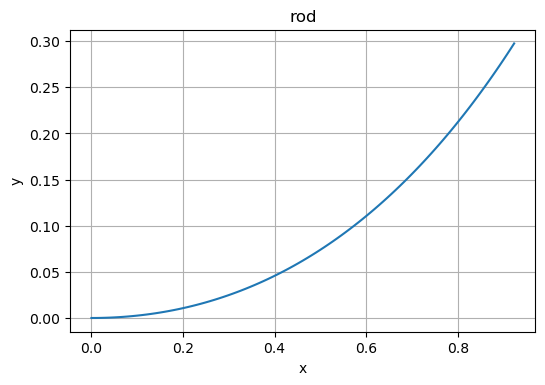

In [8]:
plt.figure(dpi=100,facecolor='w')
plt.plot(sim.y[3],sim.y[7])
axes = plt.gca()
plt.title('rod')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [9]:
display(sim.y)

array([[ 1.        ,  0.999975  ,  0.99990001, ...,  0.78736995,
         0.78355549,  0.77972357],
       [ 0.        , -0.00497488, -0.00989901, ..., -0.16790855,
        -0.16587594, -0.16376859],
       [ 0.        ,  0.00502487,  0.010099  , ...,  0.59316864,
         0.59876496,  0.60432146],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [10]:
# from mpl_toolkits import mplot3d
# ### Interpret final q's
# x = [q14[i] for i in range(nt)]
# y = [q24[i] for i in range(nt)]
# z = [q34[i] for i in range(nt)]

# # 3D plot
# fig = plt.figure(figsize = (12,10))
# ax = plt.axes(projection ='3d')
# ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
# ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
# ax.set_title('rod configuration in 3D')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.legend()
# # ax.set_xlim([0,1])
# # ax.set_ylim([0,1])
# # ax.set_zlim([0,1])
# ax.plot3D(x, y, z, linewidth=5)

NameError: name 'q14' is not defined